## 진행방향  
### 클러스터링 방법  
클러스터링 분류를 하기 위해서는 전체 데이터에서 몇 가지 특성만 골라내어서 하는것이 유리합니다. 그렇기에 Churn과 상관계수가 높은 몇 가지 특성들을 선택해 데이터를 새로 만들었고(X) 데이터를 scaled하고 진행 하였습니다. (X_scaled)  

### 클러스터 수 찾기  
kmeans로 클러스터를 찾으려면 하이퍼 파라미터로 클러스터 수를 정해 주어야합니다.  
그렇다면 최적의 클러스터를 찾는 것이 중요한데 3 가지 방법을 수행했고 가장 유력해보이는 값들을 선정 했습니다.
X_scaled에서는  4, 7개로 진행하였고 (resultdata,resultdata2)  


### PCA로 차원 축소하여 클러스터 시각화  
resultdata ,2 에서 한번씩 진행하였습니다.    
깔끔한 분류를 보입니다.

### 결과 데이터 확인  
resultdata들을 확인하면 몇 클러스터에서는 분류가 잘 된 것으로 보이나  
한 개의 클라스터에서는 명확하게 보이지 않습니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Load the data
file_path = 'model_Preprocess.csv'  # 실제 파일 경로로 변경하세요
data = pd.read_csv(file_path)

# Define the columns to exclude for clustering
excluded_columns = ['Churn']


In [3]:
data.corr()

,Complains,Charge Amount,Distinct Called Numbers,Tariff Plan,Status,Customer Value,Churn,Usage Index
Complains,1.000000,-0.035293,-0.046109,-0.000373,0.275099,-0.139945,0.538815,-0.140597
Charge Amount,-0.035293,1.000000,0.458435,0.322443,-0.355237,0.160130,-0.201476,0.391973
Distinct Called Numbers,-0.046109,0.458435,1.000000,0.199534,-0.407331,0.342377,-0.271749,0.739970
Tariff Plan,-0.000373,0.322443,0.199534,1.000000,-0.165026,0.246855,-0.107022,0.226478
Status,0.275099,-0.355237,-0.407331,-0.165026,1.000000,-0.417747,0.493410,-0.529875
Customer Value,-0.139945,0.160130,0.342377,0.246855,-0.417747,1.000000,-0.294510,0.748597
Churn,0.538815,-0.201476,-0.271749,-0.107022,0.493410,-0.294510,1.000000,-0.362200
Usage Index,-0.140597,0.391973,0.739970,0.226478,-0.529875,0.748597,-0.362200,1.000000


data를 분류하기위해서 가장 중요하다고 생각되는 특성 하나 또는 몇개를 가지고 분류를 해보겠습니다.

이 데이터는 이탈에 미치는 영향이 큰 특성이 몇 개 있습니다.

상관 계수 절대값이 큰 것들

Usage Index               -0.362200
Customer Value            -0.294510  
Status                     0.493410  
Complains                  0.538815  

이 중에서 내용이 비슷해 겹치는 것들은 제외하고 몇 가지 고르자면   
Complains,Status,Customer Value,Usage Index   
이렇게 네가지를 골라 클러스터링을 진행하겠습니다.


In [4]:
#칼럼 순서는 절대 값이 큰 순서
X = data[['Complains','Status','Usage Index','Customer Value']]

In [5]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

엘보우 그래프에서 기울기 변화가 가장 큰 곳이 적절한 클러스터 수입니다.

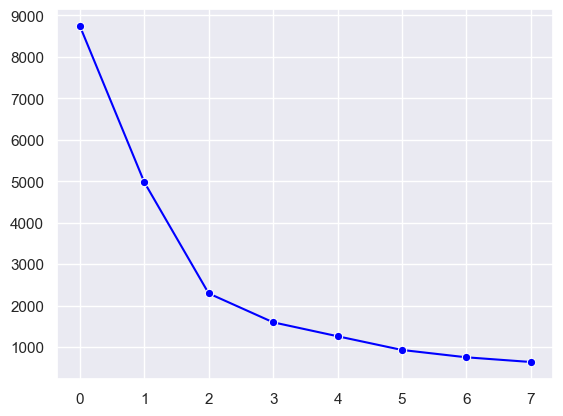

In [9]:
inertia = []
for k in range(2,10):
    km = KMeans(n_clusters=k,n_init='auto',random_state=4)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

sns.set(palette='GnBu')
sns.lineplot(data=inertia, marker='o',color = 'b' )
plt.show()


실루엣 점수는 -1에서 1 사이의 값을 가지며, 1에 가까울수록 데이터 포인트가 적절한 클러스터에 속해 있음을 나타냅니다.

For n_clusters = 2, the average silhouette score is: 0.54
For n_clusters = 3, the average silhouette score is: 0.55
For n_clusters = 4, the average silhouette score is: 0.59
For n_clusters = 5, the average silhouette score is: 0.59
For n_clusters = 6, the average silhouette score is: 0.62
For n_clusters = 7, the average silhouette score is: 0.63
For n_clusters = 8, the average silhouette score is: 0.58
For n_clusters = 9, the average silhouette score is: 0.58


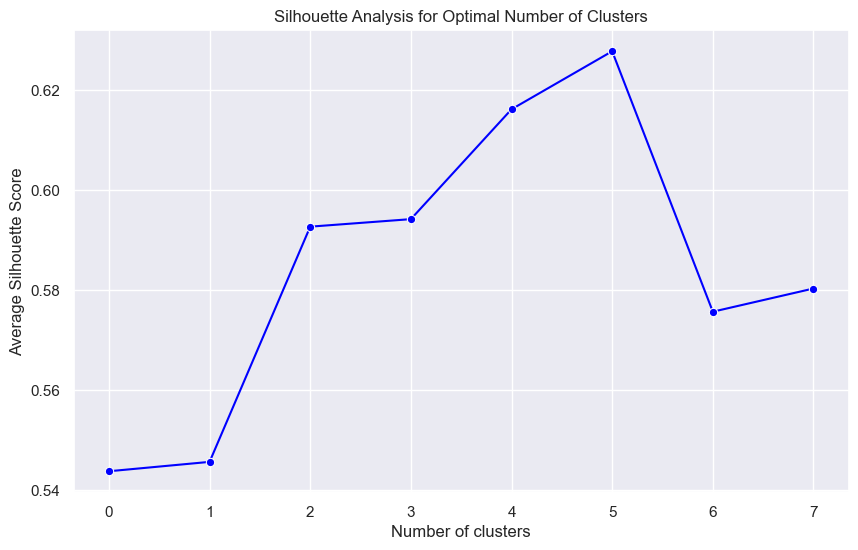

In [12]:
from sklearn.metrics import silhouette_score

silhouette_avgs = []

for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters, random_state=4)
    cluster_labels = clusterer.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.2f}")

# 실루엣 점수를 시각화
plt.figure(figsize=(10, 6))
sns.set(palette='GnBu')
sns.lineplot(data=silhouette_avgs, marker='o',color = 'b')

plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

데이터의 계층적 구조를 고려하여 클러스터링을 수행합니다.
덴드로그램을 사용하여 클러스터의 계층 구조를 시각화하고 최적의 클러스터 수를 결정할 수 있습니다.

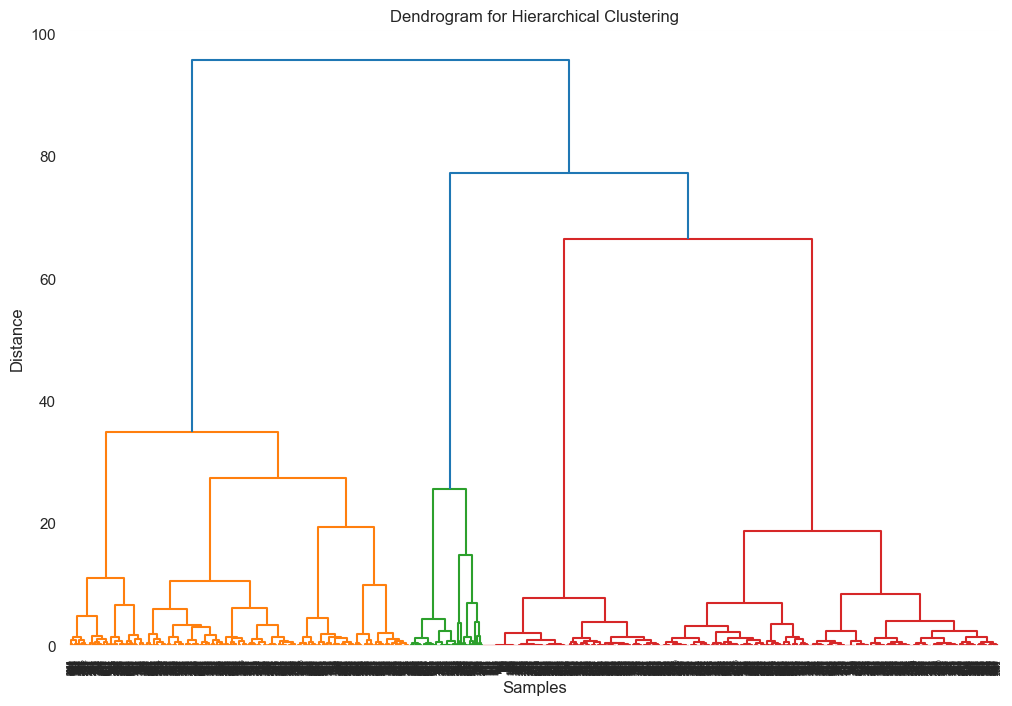

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram


# 계층적 클러스터링 수행
Z = linkage(X_scaled, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(12, 8))
dendrogram(Z)

sns.set_palette('tab10')
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

엘보우 그래프는 4에서 가장 많이 꺾이고  
실루엣 점수는 4 , 8 에서 가장 높은 점수를 보였고  
덴드로그램 시각화에서는 3~4개 의 정도의 큰 분류를 보였습니다

엘보우 그래프와 실루엣 점수에서 유력한 후보로 보이는 4개로 진행해봅시다.

In [28]:
kmeans = KMeans(n_clusters=4, random_state=4)
clusters = kmeans.fit(X_scaled)
X["cluster"] = clusters.labels_
print(X["cluster"].unique())
X.head()

[3 2 0 1]


C:\Users\USER\AppData\Local\Temp\ipykernel_14496\2520332151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters.labels_


,Complains,Status,Usage Index,Customer Value,cluster
0,0,1,-0.677079,197.640,3
1,0,2,-2.762616,46.035,2
2,0,1,1.787512,1536.520,0
3,0,1,-0.839584,240.020,3
4,0,1,-1.396760,145.805,3


In [29]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = X["cluster"]

분류가 엉망입니다.

In [34]:
%matplotlib inline
for i in X["cluster"].unique():
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

X 데이터프레임:
   Complains  Status  Usage Index  Customer Value  cluster
0          0       1    -0.677079         197.640        3
1          0       2    -2.762616          46.035        2
2          0       1     1.787512        1536.520        4
3          0       1    -0.839584         240.020        3
4          0       1    -1.396760         145.805        3
pca_df 데이터프레임:
       PCA1      PCA2  cluster
0 -0.131428 -0.596926        3
1 -2.028180 -0.502212        2
2  1.971583  0.410756        4
3 -0.127611 -0.591968        3
4 -0.375714 -0.705859        3
X['cluster']의 고유 값: [3 2 4 0 5 1 6]
pca_df['cluster']의 고유 값: [3 2 4 0 5 1 6]


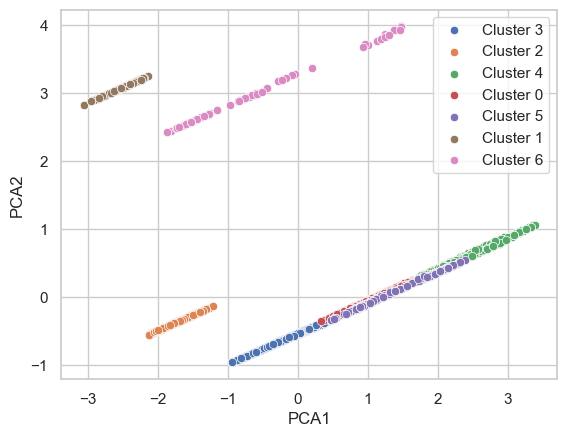

In [48]:
# 데이터프레임의 구조와 내용을 출력합니다.
print("X 데이터프레임:")
print(X.head())

print("pca_df 데이터프레임:")
print(pca_df.head())

print("X['cluster']의 고유 값:", X["cluster"].unique())
print("pca_df['cluster']의 고유 값:", pca_df["cluster"].unique())

# 고유 클러스터를 순회하면서 플롯을 그립니다.
for i in X["cluster"].unique():
    if i in pca_df["cluster"].unique():
        tmp = pca_df.loc[pca_df["cluster"] == i]
        sns.scatterplot(x=tmp.iloc[:, 0], y=tmp.iloc[:, 1], label=f'Cluster {i}')
        # plt.scatter(tmp.iloc[:, 0], tmp.iloc[:, 1], label=f'Cluster {i}')
    else:
        print(f"클러스터 {i}가 pca_df['cluster']에 없습니다.")

plt.show()

In [35]:
resultdata = pd.concat([X,data['Churn']],axis=1)

In [36]:
resultdata

,Complains,Status,Usage Index,Customer Value,cluster,Churn
0,0,1,-0.677079,197.640,3,0
1,0,2,-2.762616,46.035,2,0
2,0,1,1.787512,1536.520,0,0
3,0,1,-0.839584,240.020,3,0
4,0,1,-1.396760,145.805,3,0
...,...,...,...,...,...,...
3025,0,1,1.955050,721.980,0,0
3026,0,1,2.970900,261.210,0,0
3027,0,1,-1.021033,280.320,3,0
3028,0,1,0.872422,1077.640,0,0


In [37]:
resultdata.groupby(['cluster','Churn']).count()['Status']

cluster  Churn
0        0        1041
1        0          41
         1         195
2        0         372
         1         210
3        0        1106
         1          65
Name: Status, dtype: int64

클러스터가 0 과 1 인 경우에는 Churn 이 0인 부류(고객이 이탈하지않은 경우)가 주를 이루었고   
클러스터가 3 인 부류에는 Churn이 1인 부류가(고객이 이탈한경우)주를 이룹니다  
하지만 2 인부류에서는 명확하게 분류가 되지 않은 것처럼보입니다.  



혹시나 하고 실루엣 점수에서 높은 7로 진행 해보았는데 역시나입니다.

In [38]:
kmeans = KMeans(n_clusters=7, random_state=4)
clusters = kmeans.fit(X_scaled)
X["cluster"] = clusters.labels_
print(X["cluster"].unique())
X.head()

[3 2 4 0 5 1 6]


C:\Users\USER\AppData\Local\Temp\ipykernel_14496\2512671983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters.labels_


,Complains,Status,Usage Index,Customer Value,cluster
0,0,1,-0.677079,197.640,3
1,0,2,-2.762616,46.035,2
2,0,1,1.787512,1536.520,4
3,0,1,-0.839584,240.020,3
4,0,1,-1.396760,145.805,3


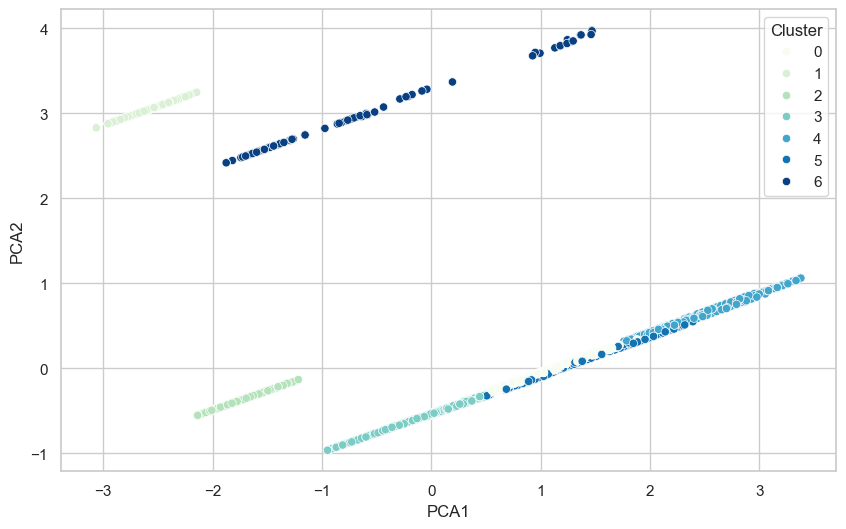

In [54]:
# pca = PCA(n_components=2)
# pca.fit(X_scaled)
# x_pca = pca.transform(X_scaled)
# pca_df = pd.DataFrame(x_pca)
# pca_df["cluster"] = X["cluster"]
# %matplotlib inline
# for i in X["cluster"].unique():
#     tmp = pca_df.loc[pca_df["cluster"]==i]
#     plt.scatter(tmp[0], tmp[1])

pca = PCA(n_components=2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
pca_df = pd.DataFrame(x_pca, columns=['PCA1', 'PCA2'])
pca_df["cluster"] = X["cluster"]

sns.set(style="whitegrid")
# 시각화 - GnBu 팔레트
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='GnBu')
plt.legend(title='Cluster')
plt.show()

In [40]:
resultdata2 = pd.concat([X,data['Churn']],axis=1)
resultdata2
resultdata2.groupby(['cluster','Churn']).count()['Status']

cluster  Churn
0        0         496
1        0          17
         1         136
2        0         372
         1         210
3        0        1020
         1          65
4        0         310
5        0         321
6        0          24
         1          59
Name: Status, dtype: int64